Chapter 8
# 股价模型
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader 
import scipy.stats as stats

In [2]:
# Calibrate

df = pandas_datareader.data.DataReader(['sp500'], data_source='fred', start='08-01-2017', end='08-01-2021')
df = df.dropna()
df.to_csv('sp500.csv')
df.to_pickle('sp500.pkl')
print(df.tail())
#% Plot price levels of S&P 500

              sp500
DATE               
2021-07-26  4422.30
2021-07-27  4401.46
2021-07-28  4400.64
2021-07-29  4419.15
2021-07-30  4395.26


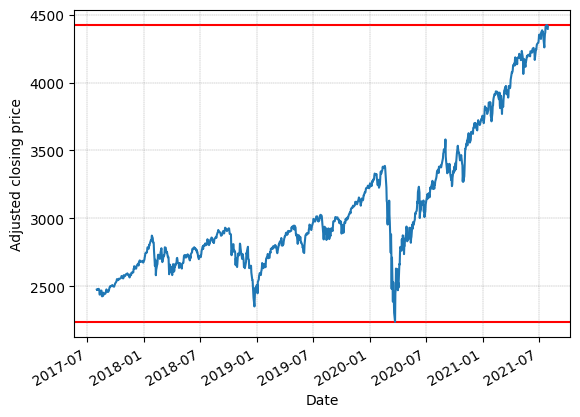

In [3]:
fig, ax = plt.subplots()

df['sp500'].plot()

plt.axhline(y=df['sp500'].max(), color= 'r', zorder=0)
plt.axhline(y=df['sp500'].min(), color= 'r', zorder=0)
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])

plt.xlabel('Date')
plt.ylabel('Adjusted closing price')
plt.show()

In [4]:
#%% daily log return

daily_log_r = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))

daily_log_r = daily_log_r.dropna()

values = daily_log_r[1:]
mu_log_r, sigma_log_r = stats.norm.fit(values)

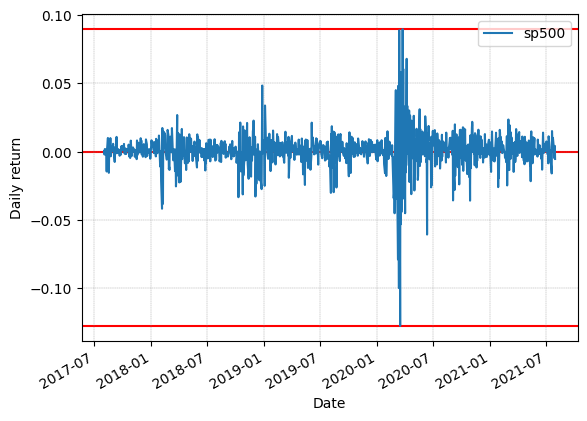

In [5]:
fig, ax = plt.subplots()

daily_log_r.plot(ax = ax)

plt.axhline(y=daily_log_r.max().values, color= 'r', zorder=0)
plt.axhline(y=0, color= 'r', zorder=0)
plt.axhline(y=daily_log_r.min().values, color= 'r', zorder=0)
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])

plt.xlabel('Date')
plt.ylabel('Daily return')
plt.show()

Text(0.5, 1.0, '$\\mu_{daily}$ =  0.001 \n $\\sigma_{daily}$ = 0.013')

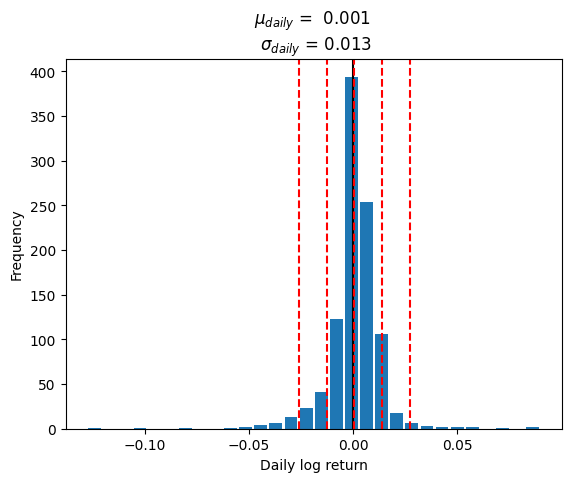

In [6]:
# distribution of daily log returns and descriptive stats

fig, ax = plt.subplots()

ax.hist(daily_log_r,bins=30, rwidth=0.85)
plt.axvline(x=0, color='k', linestyle='-')
plt.axvline(x=mu_log_r, color='r', linestyle='--')
plt.axvline(x=mu_log_r + sigma_log_r, color='r', linestyle='--')
plt.axvline(x=mu_log_r - sigma_log_r, color='r', linestyle='--')
plt.axvline(x=mu_log_r + 2*sigma_log_r, color='r', linestyle='--')
plt.axvline(x=mu_log_r - 2*sigma_log_r, color='r', linestyle='--')

plt.xlabel('Daily log return')
plt.ylabel('Frequency')
plt.title('$\mu_{daily}$ =  %1.3f \n $\sigma_{daily}$ = %1.3f' %(mu_log_r, sigma_log_r))

In [7]:
#%% Simulation

mu = mu_log_r*250
# annualized expected return

sigma = sigma_log_r*np.sqrt(250)
# square root of time rule

drift = (mu - sigma ** 2 / 2)
# drift

n = 50
# simulation steps

dt = 1/250 
# assume 250 business days in a year

S0 = df['sp500'][-1]
# current stock price level

np.random.seed(1)

num_paths = 100;

wt = np.random.normal(0, np.sqrt(dt), size=(num_paths, n)).T

S = np.exp(drift*dt + sigma * wt)
S = np.vstack([np.ones(num_paths), S])
# Stack arrays in sequence vertically

S = S0 * S.cumprod(axis=0)

#%% plot paths and distribution for last day

C:\Users\james\AppData\Local\Temp\ipykernel_13556\2313343290.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(S[-1], rug=True, vertical=True)


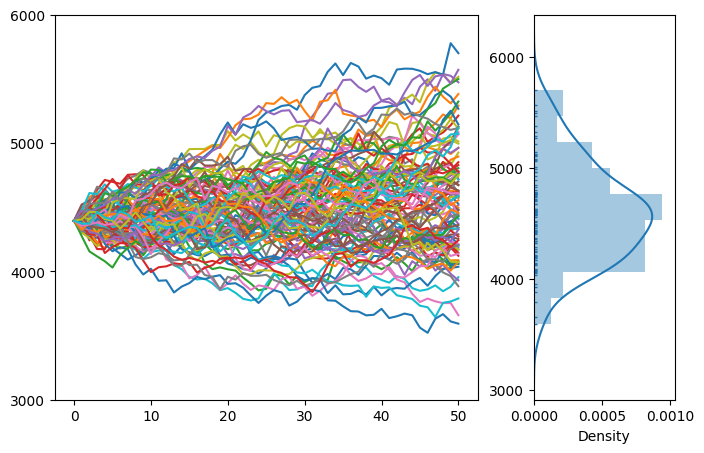

In [8]:
import seaborn as sns

rows = 1
cols = 2
fig, (ax1, ax2) = plt.subplots(rows, cols, figsize=(8,5), gridspec_kw={'width_ratios': [3, 1]})
ax1.plot(S)
ax1.set_yticks([3000,4000,5000,6000])
ax2 = sns.distplot(S[-1], rug=True, vertical=True)
ax2.set_yticks([3000,4000,5000,6000])